In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle
import seaborn as sns

# Initial-preprocessing

In [39]:
import joblib

# Load in the dataset
spotify_data = pd.read_csv('../1_data/raw/dataset.csv', index_col=0)

# Select columns of interest
selected_spotify_data = spotify_data[['danceability', 'energy', 'loudness',
                                      'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                                      'valence', 'tempo', 'track_genre']]

# Drop any Na's
selected_spotify_data = selected_spotify_data.dropna()

# Genre to category mapping for playlist creation
genre_to_category = {
    # EDM
    'edm': 'Electronic Dance Music',
    'house': 'Electronic Dance Music',
    'electro': 'Electronic Dance Music',
    'trance': 'Electronic Dance Music',
    'techno': 'Electronic Dance Music',
    'dubstep': 'Electronic Dance Music',
    'drum-and-bass': 'Electronic Dance Music',
    'deep-house': 'Electronic Dance Music',
    'detroit-techno': 'Electronic Dance Music',
    'minimal-techno': 'Electronic Dance Music',
    'progressive-house': 'Electronic Dance Music',
    'breakbeat': 'Electronic Dance Music',

    # Rock
    'alt-rock': 'Rock',
    'rock': 'Rock',
    'indie': 'Rock',
    'indie-pop': 'Rock',
    'punk': 'Rock',
    'punk-rock': 'Rock',
    'hard-rock': 'Rock',
    'metal': 'Rock',
    'heavy-metal': 'Rock',
    'black-metal': 'Rock',
    'death-metal': 'Rock',
    'grunge': 'Rock',

    # Hip-Hop and R&B
    'hip-hop': 'Hip-Hop and R&B',
    'r-n-b': 'Hip-Hop and R&B',
    'trap': 'Hip-Hop and R&B',

    # Pop
    'pop': 'Pop',
    'electro-pop': 'Pop',
    'synth-pop': 'Pop',
    'k-pop': 'Pop',
    'pop-film': 'Pop',
    'power-pop': 'Pop',

    # Latin & Reggae/Dancehall
    'latin': 'Latin & Reggae/Dancehall',
    'reggaeton': 'Latin & Reggae/Dancehall',
    'salsa': 'Latin & Reggae/Dancehall',
    'samba': 'Latin & Reggae/Dancehall',
    'reggae': 'Latin & Reggae/Dancehall',
    'dancehall': 'Latin & Reggae/Dancehall',

    # Funk and Disco
    'funk': 'Funk and Disco',
    'disco': 'Funk and Disco',
    'groove': 'Funk and Disco',
}

# Map each track to a category
selected_spotify_data['music_category'] = selected_spotify_data['track_genre'].apply(
    lambda x: genre_to_category.get(x, 'Other'))

# Filter out 20k samples of 'Other' category
other_category_samples = selected_spotify_data[selected_spotify_data['music_category'] == 'Other'].sample(n=20000, random_state=50)

# Concatenate the filtered 'Other' samples with the rest of the data
selected_spotify_data = pd.concat([selected_spotify_data[selected_spotify_data['music_category'] != 'Other'], other_category_samples])

# Save the selected data to a CSV file
selected_spotify_data.to_csv('../1_data/derived/selected_spotify_data.csv')


# Split data into features (X) and target variable (y)
X = selected_spotify_data.drop(columns=['music_category', 'track_genre']).to_numpy()
y = selected_spotify_data['music_category']

# Encode the categorical target variable y
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Create a StandardScaler instance
scaler = StandardScaler(with_mean=True)

# Split data into training testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.15, random_state=100)

# Fit and transform train data
X_train_normalised = scaler.fit_transform(X_train)

# Transform test data using scalar trained on train data
X_test_normalised = scaler.transform(X_test)

# Save X_train_normalised to CSV
pd.DataFrame(X_train_normalised).to_csv('../1_data/derived/X_train_normalised.csv', index=False)

# Save X_test_normalised to CSV
pd.DataFrame(X_test_normalised).to_csv('../1_data/derived/X_test_normalised.csv', index=False)

# Save y_train to CSV
pd.DataFrame(y_train).to_csv('../1_data/derived/y_train.csv', index=False, header=['track_genre_encoded'])

# Save y_test to CSV
pd.DataFrame(y_test).to_csv('../1_data/derived/y_test.csv', index=False, header=['track_genre_encoded'])

# Save the scaler object
joblib.dump(scaler, '../1_data/derived/scaler_values.joblib')

# Save the LabelEncoder object
joblib.dump(label_encoder, '../1_data/derived/label_encoder.joblib')

['../1_data/derived/label_encoder.joblib']

In [40]:
# Load the scaler object
scaler_loaded = joblib.load('../1_data/derived/scaler_values.joblib')

X_new_transformed = scaler_loaded.transform(X_test_normalised)

# Load the LabelEncoder object
label_encoder_loaded = joblib.load('../1_data/derived/label_encoder.joblib')

y_new_encoded = label_encoder_loaded.transform(y)

In [ ]:
# Save scaler object using pickle
with open('../1_data/derived/scaler_values.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save label_encoder object using pickle
with open('../1_data/derived/label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [41]:
# Get unique encoded labels and their corresponding original labels
unique_encoded_labels = np.unique(y_encoded)
original_labels = label_encoder.inverse_transform(unique_encoded_labels)

# Print unique encoded labels along with their corresponding original labels
print("Unique encoded labels with corresponding original labels:")
for encoded_label, original_label in zip(unique_encoded_labels, original_labels):
    print(f"Encoded label: {encoded_label}, Original label: {original_label}")

Unique encoded labels with corresponding original labels:
Encoded label: 0, Original label: Electronic Dance Music
Encoded label: 1, Original label: Funk and Disco
Encoded label: 2, Original label: Hip-Hop and R&B
Encoded label: 3, Original label: Latin & Reggae/Dancehall
Encoded label: 4, Original label: Other
Encoded label: 5, Original label: Pop
Encoded label: 6, Original label: Rock


# Analysis of dataset

In [8]:
selected_spotify_data

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,music_category
2000,0.588,0.521,-9.461,0.0329,0.06780,0.149000,0.1230,0.3370,85.012,alt-rock,Rock
2001,0.705,0.712,-6.156,0.0385,0.01020,0.000855,0.1000,0.6200,97.512,alt-rock,Rock
2002,0.575,0.568,-5.509,0.0300,0.04840,0.000417,0.2860,0.3700,93.986,alt-rock,Rock
2003,0.612,0.807,-2.810,0.0336,0.04950,0.017700,0.1010,0.3980,124.053,alt-rock,Rock
2004,0.551,0.881,-6.099,0.0542,0.18600,0.079100,0.1520,0.3870,88.036,alt-rock,Rock
...,...,...,...,...,...,...,...,...,...,...,...
66944,0.813,0.712,-5.104,0.2810,0.04620,0.000000,0.0433,0.5870,179.948,kids,Other
84351,0.332,0.786,-4.112,0.0334,0.02950,0.941000,0.4180,0.4440,139.988,psych-rock,Other
113432,0.161,0.897,-22.398,0.0804,0.00163,0.920000,0.8630,0.0247,110.367,world-music,Other
94077,0.682,0.598,-5.694,0.2640,0.05750,0.000000,0.2990,0.8230,103.791,sad,Other


In [9]:
descriptive_stats = selected_spotify_data.describe()
print(descriptive_stats)

       danceability        energy      loudness   speechiness  acousticness  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.582464      0.690168     -7.429974      0.082803      0.242586   
std        0.169514      0.225229      4.230416      0.093135      0.296308   
min        0.000000      0.000019    -46.251000      0.000000      0.000000   
25%        0.472000      0.553000     -8.999000      0.037000      0.008070   
50%        0.597000      0.731000     -6.451000      0.050900      0.095400   
75%        0.710000      0.873000     -4.731000      0.086400      0.416000   
max        0.983000      1.000000      1.821000      0.962000      0.996000   

       instrumentalness      liveness       valence         tempo  
count      60000.000000  60000.000000  60000.000000  60000.000000  
mean           0.146966      0.208761      0.482740    123.438123  
std            0.297672      0.184317      0.255706     29.007462  
min            0

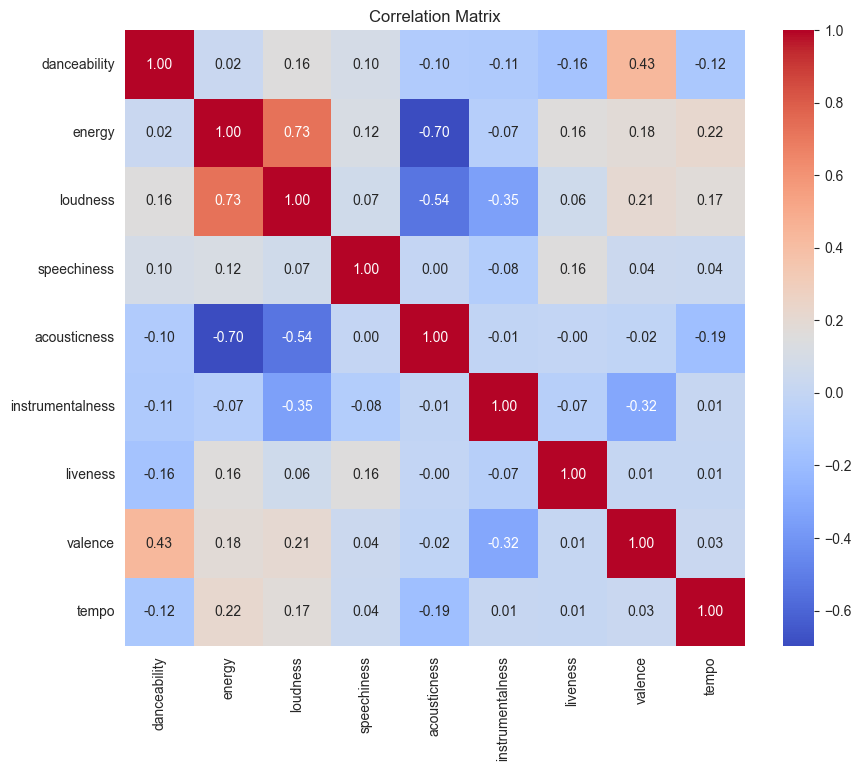

In [13]:
# Select all columns except the last one (genre)
columns_to_include = selected_spotify_data.iloc[:, :-2]

# Compute correlation matrix
correlation_matrix = columns_to_include.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

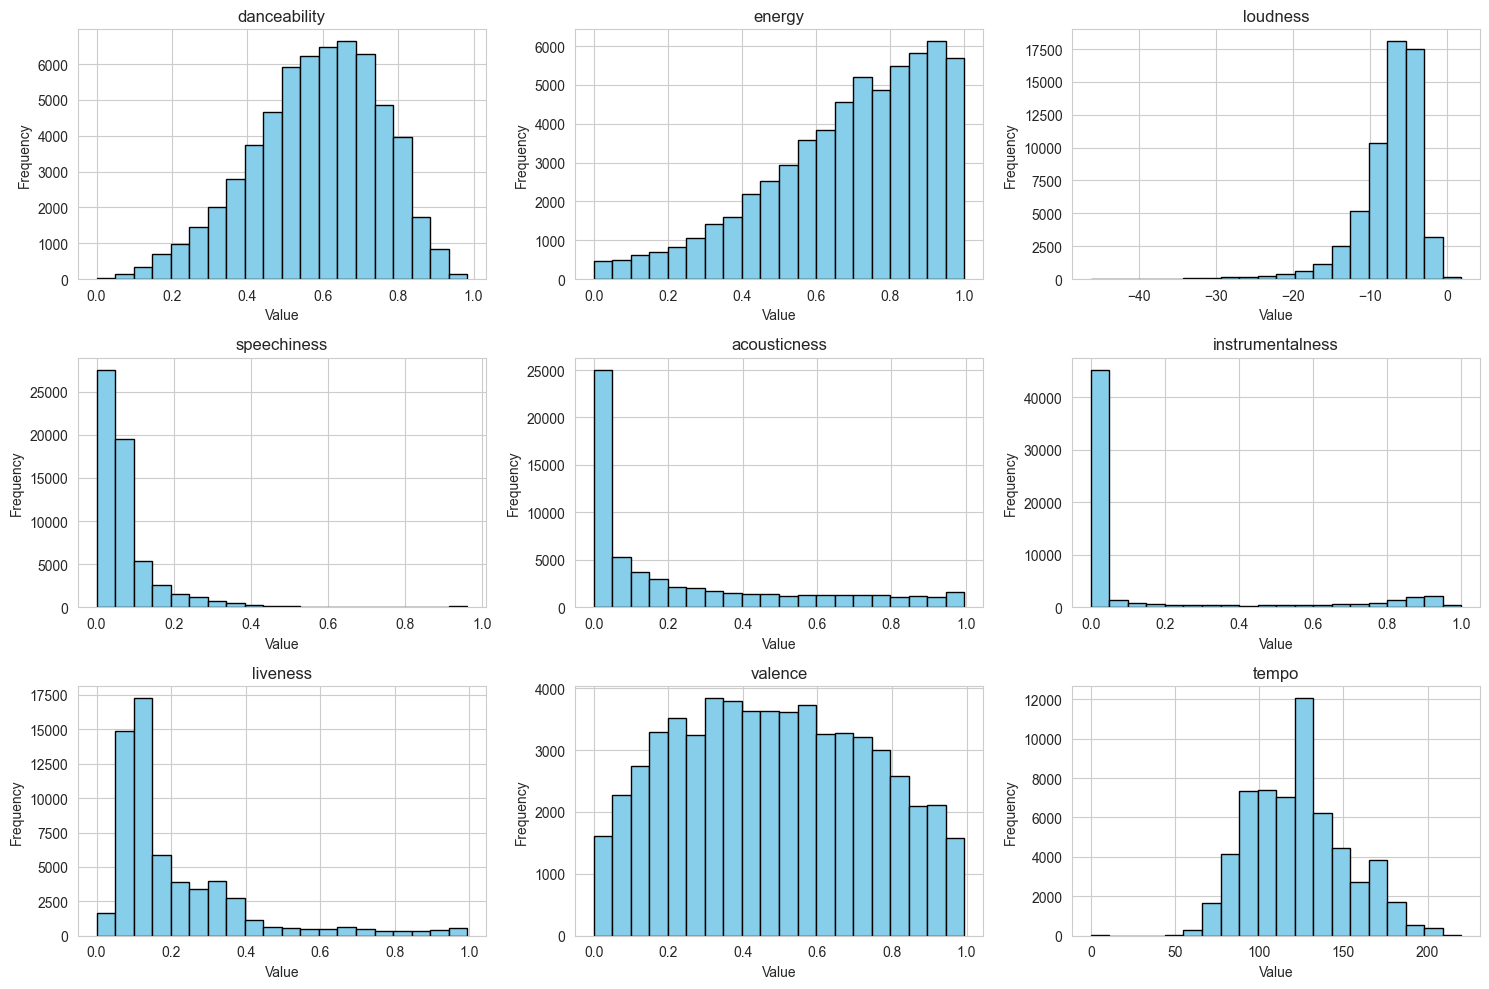

In [15]:
import matplotlib.pyplot as plt
import math

# Select all columns except the last one (genre)
columns_to_include = selected_spotify_data.iloc[:, 0:-2]

# Determine the number of rows and columns for the subplot grid
num_columns = columns_to_include.shape[1]
num_rows = math.ceil(num_columns / 3)

# Create a 4x3 grid of subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 10))

# Flatten the axes array to facilitate iteration
axes = axes.flatten()

# Plot histograms for each column
for i, column in enumerate(columns_to_include.columns):
    ax = axes[i]  # Get the current axis
    ax.hist(columns_to_include[column], bins=20, color='skyblue', edgecolor='black', zorder=2)
    ax.set_title(column)  # Set the title of the subplot
    ax.set_xlabel('Value')  # Set the x-axis label
    ax.set_ylabel('Frequency')  # Set the y-axis label
    ax.grid(True, zorder=0)  # Add gridlines

# Hide empty subplots if necessary
for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


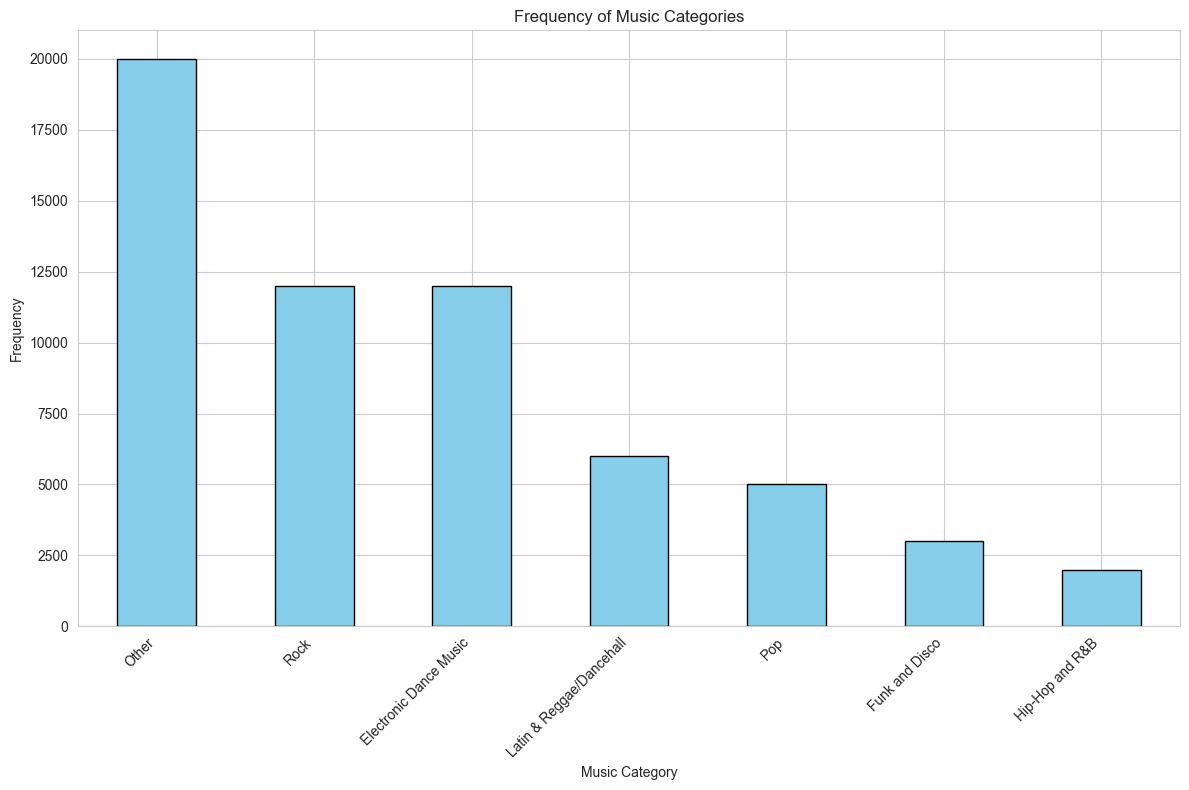

In [16]:
# Count the frequencies of each category
category_counts = selected_spotify_data['music_category'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 8))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Music Categories')
plt.xlabel('Music Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()

# Modelling

# KNN

In [52]:
# Load in the dataset
X_train = pd.read_csv('../1_data/derived/X_train_normalised.csv').to_numpy()
X_test = pd.read_csv('../1_data/derived/X_test_normalised.csv').to_numpy()
y_train = pd.read_csv('../1_data/derived/y_train.csv').to_numpy().ravel()
y_test = pd.read_csv('../1_data/derived/y_test.csv').to_numpy().ravel()

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

np.random.seed(10)

def knn_cross_validation(data_x, data_y, ks=np.arange(1, 40)[::2], ps=[1, 2], weights=['uniform', 'distance']):
    """
    Perform k-Nearest Neighbors cross-validation for classification.

    Parameters:
        data_x (numpy.ndarray): Input features.
        data_y (numpy.ndarray): Target labels.
        ks (array-like, optional): List of numbers of neighbors to consider. Defaults to np.arange(1, 40)[::2].
        ps (list, optional): List of Minkowski distances parameter values. Defaults to [1, 2].
        weights (list, optional): List of weight functions used in prediction. Defaults to ['uniform', 'distance'].

    Returns:
        dict: Dictionary containing mean cross-validation scores for each combination of parameters.
    """
    # Dictionary to store mean cross-validation scores for each combination
    mean_cv_scores_dict = {}

    # Loop over each combination of weight function and Minkowski distance parameter
    for weight in weights:
        for p in ps:
            print(f'Started: {weight} with distance {p}') 
            
            mean_cv_scores = []  # List to store mean cross-validation scores for the current combination
            
            # Loop over each number of neighbors
            for i, parameter in enumerate(ks):
                # Initialize KNN classifier model with the current combination of parameters
                KNN = KNeighborsClassifier(n_neighbors=parameter, weights=weight, algorithm="auto", metric="minkowski", p=p)
                
                # Perform k-fold Cross-Validation
                kf = KFold(n_splits=10)  # Split data into 2 folds
                
                # List to store cross-validation scores
                cv_scores = []
                
                # Iterate over each fold and calculate cross-validation score
                for train_index, val_index in kf.split(data_x):
                    X_train, X_val = data_x[train_index], data_x[val_index]
                    y_train, y_val = data_y[train_index], data_y[val_index]
                    
                    # Fit KNN classifier model
                    KNN.fit(X_train, y_train)
                    
                    # Predict on the validation set
                    y_pred = KNN.predict(X_val)
                    
                    # Calculate accuracy
                    accuracy = accuracy_score(y_val, y_pred)
                    
                    # Append accuracy to the list of cross-validation scores
                    cv_scores.append(accuracy)
                
                # Calculate mean cross-validation score
                mean_cv_score = np.mean(cv_scores)
                mean_cv_scores.append(mean_cv_score)
                
                print(f'Parameter K: {i}/{len(ks)}')  
            
            # Store the mean cross-validation scores for the current combination in the dictionary
            mean_cv_scores_dict[(weight, p)] = mean_cv_scores
            
            print(f'Finished: {weight} with distance {p}') 
    
    return mean_cv_scores_dict

ks=np.arange(1, 40)[::2]

mean_cv_scores_dict = knn_cross_validation(X_train, y_train, ks)

Started: uniform with distance 1
Parameter K: 0/20
Parameter K: 1/20
Parameter K: 2/20
Parameter K: 3/20
Parameter K: 4/20
Parameter K: 5/20
Parameter K: 6/20
Parameter K: 7/20
Parameter K: 8/20
Parameter K: 9/20
Parameter K: 10/20
Parameter K: 11/20
Parameter K: 12/20
Parameter K: 13/20
Parameter K: 14/20
Parameter K: 15/20
Parameter K: 16/20
Parameter K: 17/20
Parameter K: 18/20
Parameter K: 19/20
Finished: uniform with distance 1
Started: uniform with distance 2
Parameter K: 0/20
Parameter K: 1/20
Parameter K: 2/20
Parameter K: 3/20
Parameter K: 4/20
Parameter K: 5/20
Parameter K: 6/20
Parameter K: 7/20
Parameter K: 8/20
Parameter K: 9/20
Parameter K: 10/20
Parameter K: 11/20
Parameter K: 12/20
Parameter K: 13/20
Parameter K: 14/20
Parameter K: 15/20
Parameter K: 16/20
Parameter K: 17/20
Parameter K: 18/20
Parameter K: 19/20
Finished: uniform with distance 2
Started: distance with distance 1
Parameter K: 0/20
Parameter K: 1/20
Parameter K: 2/20
Parameter K: 3/20
Parameter K: 4/20
Pa

In [92]:
mean_cv_scores_dict

{('uniform', 1): [0.5302941176470588,
  0.5160980392156862,
  0.5315294117647059,
  0.5350588235294118,
  0.5376470588235294,
  0.5377647058823529,
  0.5380392156862743,
  0.538843137254902,
  0.5384705882352941,
  0.5397058823529413,
  0.5382156862745097,
  0.5375686274509804,
  0.5372352941176469,
  0.5366274509803921,
  0.536078431372549,
  0.5357058823529413,
  0.5346666666666666,
  0.5339607843137254,
  0.5337254901960785,
  0.5327450980392157],
 ('uniform', 2): [0.5269999999999999,
  0.515156862745098,
  0.5286666666666667,
  0.5299411764705881,
  0.5317450980392158,
  0.5313921568627451,
  0.5319803921568627,
  0.5332156862745097,
  0.5329607843137254,
  0.5338627450980391,
  0.5340980392156863,
  0.5346470588235295,
  0.5329411764705883,
  0.5338627450980392,
  0.5325882352941177,
  0.5311960784313726,
  0.5310392156862745,
  0.5314117647058824,
  0.5315098039215685,
  0.5312156862745098],
 ('distance', 1): [0.5302941176470588,
  0.5451764705882353,
  0.5613529411764706,
  0.56

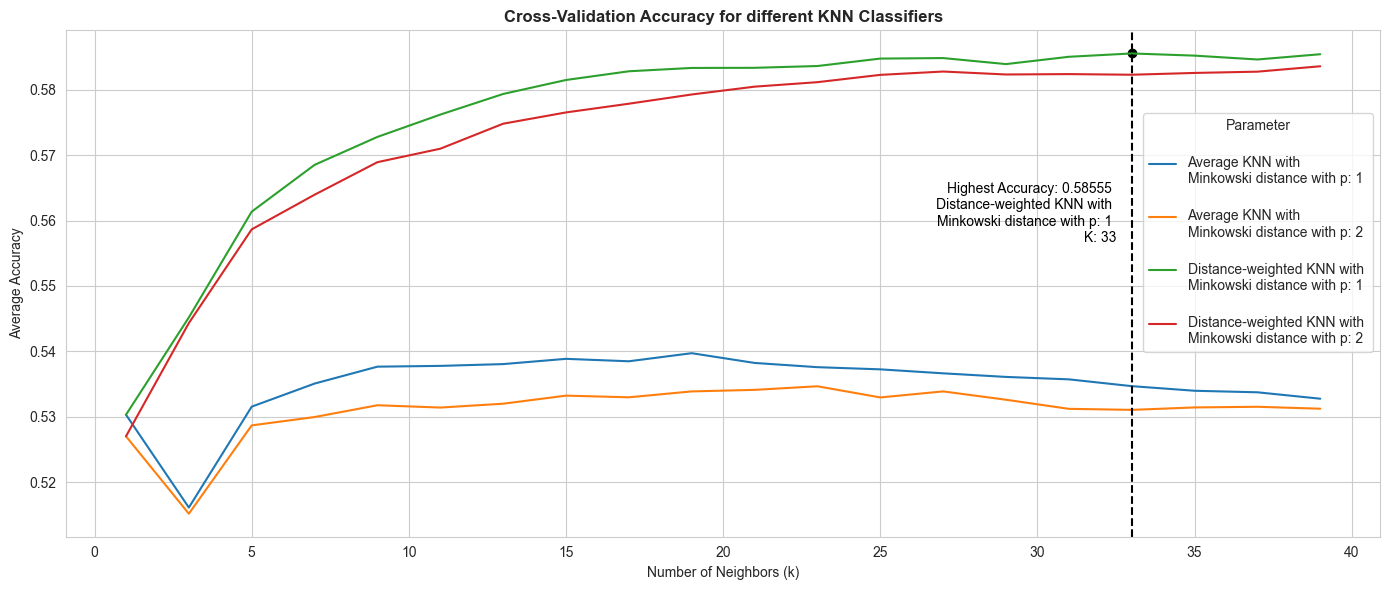

In [120]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt


def plot_mean_cv_scores_list(mean_cv_scores_dicts, titles, ks):
    p_s=[1, 2]
    weights=['uniform', 'distance']
    
    num_plots = len(mean_cv_scores_dicts)
    
    fig, axs = plt.subplots(num_plots, 1, figsize=(14, 6*num_plots))
    
    for i, (mean_cv_scores_dict, title) in enumerate(zip(mean_cv_scores_dicts, titles)):
        max_accuracy = 0
        max_accuracy_k = None
        max_accuracy_weight = None
        max_accuracy_p = None
        
        for weight in weights:
            for p in p_s:
                # Extract mean cross-validation scores for the current combination
                mean_cv_scores = mean_cv_scores_dict[(weight, p)]
                
                # Find the maximum accuracy and its corresponding k value
                max_mean_cv_score = max(mean_cv_scores)
                max_mean_cv_score_k = ks[np.argmax(mean_cv_scores)]
                
                if max_mean_cv_score > max_accuracy:
                    max_accuracy = max_mean_cv_score
                    max_accuracy_k = max_mean_cv_score_k
                    max_accuracy_weight = weight
                    max_accuracy_p = p
                
                if weight == "distance":
                    axs.plot(ks, mean_cv_scores, label=f'\nDistance-weighted KNN with \nMinkowski distance with p: {p}')
                else:
                    axs.plot(ks, mean_cv_scores, label=f'\nAverage KNN with \nMinkowski distance with p: {p}')

        # Plot vertical line at the k value corresponding to the highest accuracy
        axs.axvline(x=max_accuracy_k, color='black', linestyle='--')
        
        axs.scatter(max_accuracy_k, max_accuracy, color = "black")
        # Add text mentioning the combination and the value of the highest accuracy
        if max_accuracy_weight == "distance":
            axs.text(max_accuracy_k-0.5 , max_accuracy *0.95,
                      f'Highest Accuracy: {max_accuracy:.5f} \nDistance-weighted KNN with \nMinkowski distance with p: {max_accuracy_p} \nK: {max_accuracy_k}', 
                     verticalalignment='bottom', horizontalalignment='right', color='black')
        else:
            axs.text(max_accuracy_k + 0.1, max_accuracy *0.95,
                      f'Highest Accuracy: {max_accuracy:.5f} \nAverage KNN with \nMinkowski distance with p: {max_accuracy_p} \nK: {max_accuracy_k}', 
                     verticalalignment='bottom', horizontalalignment='right', color='black')

        axs.set_title(title, fontweight="bold")
        axs.set_xlabel('Number of Neighbors (k)')
        axs.set_ylabel('Average Accuracy')
        axs.legend(loc='upper right', bbox_to_anchor=(1, 0.85), title = "Parameter")
        axs.grid(True)
    
    plt.tight_layout()
    
    # Save the plot as an image file with high resolution (300 dpi)
    plt.savefig("KNN_classifier_hyperparameter_tuning_plot.png", dpi=300, bbox_inches='tight')
    
    plt.show()
    
    return max_accuracy_p, max_accuracy_weight, max_accuracy_k

    
titles = ['Cross-Validation Accuracy for different KNN Classifiers']

max_accuracy_p, max_accuracy_weight, max_accuracy_k = plot_mean_cv_scores_list([mean_cv_scores_dict], titles, ks)


In [118]:
# Fit the best model on whole data
best_model_knn = KNeighborsClassifier(n_neighbors=max_accuracy_k, weights=max_accuracy_weight, algorithm="auto", metric="minkowski", p=max_accuracy_p)
best_model_knn.fit(X_train, y_train)

# Save model
# joblib.dump(best_model_knn, best_model_knn.joblib)


import pickle

# Save the model
with open("best_model_knn.pkl", "wb") as f:
    pickle.dump(best_model_knn, f)
    
# Load the model
with open("best_model_knn.pkl", "rb") as f:
    loaded_model = pickle.load(f)




# Now you can use the loaded_model for predictions
# For example:
# predictions = loaded_model.predict(X_test)

In [119]:
loaded_model

KNeighborsClassifier(n_neighbors=33, p=1, weights='distance')

# Decison Trees

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

def tune_decision_tree_ccp_alpha_classifier(X_train_data, y_train_data, ccp_alpha_values, n_splits=5):
    """
    Tunes the 'ccp_alpha' hyperparameter of Decision Tree Classifier using K-Fold Cross-Validation.

    Parameters:
    - X_train_data (array-like): Training features.
    - y_train_data (array-like): Training labels.
    - ccp_alpha_values (array-like): List of values to try for the 'ccp_alpha' hyperparameter.
    - n_splits (int, optional): Number of folds for K-Fold Cross-Validation. Default is 5.

    Returns:
    - best_ccp_alpha (float): Best value found for the 'ccp_alpha' hyperparameter.
    - best_accuracy (float): Accuracy achieved by the best 'ccp_alpha'.
    - accuracy_values (dict): Dictionary containing average accuracy values for each 'ccp_alpha'.
    """

    accuracy_values = {}  # Dictionary to store average accuracy values for each ccp_alpha

    # Initialize K-Fold cross-validator
    kf = KFold(n_splits=n_splits)

    num_comb = len(ccp_alpha_values)
    i = 0
    # Loop through all values of ccp_alpha
    for ccp_alpha in ccp_alpha_values:
        accuracy_list = []  # List to store accuracy values for current ccp_alpha
        # Loop through each fold of K-Fold CV
        for train_index, val_index in kf.split(X_train_data):
            X_train, X_val = X_train_data[train_index], X_train_data[val_index]
            y_train, y_val = y_train_data[train_index], y_train_data[val_index]
            # Initialize the DecisionTreeClassifier with current ccp_alpha
            tree_classifier = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=50)
            # Fit the model to the training data
            tree_classifier.fit(X_train, y_train)
            # Predict on the validation set
            y_pred = tree_classifier.predict(X_val)
            # Calculate accuracy for this fold
            accuracy = accuracy_score(y_val, y_pred)
            accuracy_list.append(accuracy)
        # Calculate average accuracy across all folds for this ccp_alpha
        avg_accuracy = np.mean(accuracy_list)
        # Store the average accuracy value for this ccp_alpha
        accuracy_values[ccp_alpha] = avg_accuracy
        i += 1
        print(f'Done {i}/{num_comb}')

    # Find the best ccp_alpha based on the highest average accuracy
    best_ccp_alpha = max(accuracy_values, key=accuracy_values.get)
    best_accuracy = accuracy_values[best_ccp_alpha]

    print("Best ccp_alpha:", best_ccp_alpha)
    print("Accuracy (after tuning):", best_accuracy)

    return best_ccp_alpha, best_accuracy, accuracy_values

# Define lists of values for hyperparameters
ccp_alpha_values = np.logspace(np.log10(0.000001), np.log10(0.1), 200)
best_ccp_alpha, best_accuracy, accuracy_values = tune_decision_tree_ccp_alpha_classifier(X_train, y_train, ccp_alpha_values, n_splits=5)

Done 1/200
Done 2/200
Done 3/200
Done 4/200
Done 5/200
Done 6/200
Done 7/200
Done 8/200
Done 9/200
Done 10/200
Done 11/200
Done 12/200
Done 13/200
Done 14/200
Done 15/200
Done 16/200
Done 17/200
Done 18/200
Done 19/200
Done 20/200
Done 21/200
Done 22/200
Done 23/200
Done 24/200
Done 25/200
Done 26/200
Done 27/200
Done 28/200
Done 29/200
Done 30/200
Done 31/200
Done 32/200
Done 33/200
Done 34/200
Done 35/200
Done 36/200
Done 37/200
Done 38/200
Done 39/200
Done 40/200
Done 41/200
Done 42/200
Done 43/200
Done 44/200
Done 45/200
Done 46/200
Done 47/200
Done 48/200
Done 49/200
Done 50/200
Done 51/200
Done 52/200
Done 53/200
Done 54/200
Done 55/200
Done 56/200
Done 57/200
Done 58/200
Done 59/200
Done 60/200
Done 61/200
Done 62/200
Done 63/200
Done 64/200
Done 65/200
Done 66/200
Done 67/200
Done 68/200
Done 69/200
Done 70/200
Done 71/200
Done 72/200
Done 73/200
Done 74/200
Done 75/200
Done 76/200
Done 77/200
Done 78/200
Done 79/200
Done 80/200
Done 81/200
Done 82/200
Done 83/200
Done 84/200
D

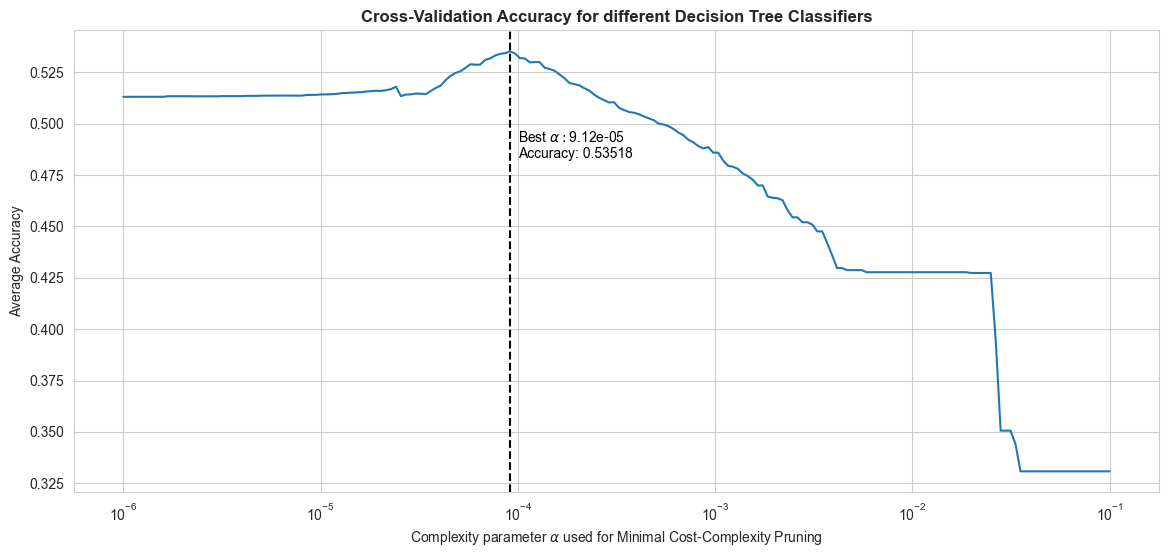

In [154]:
import matplotlib.pyplot as plt

def plot_accuracy_values(accuracy_values, best_ccp_alpha, best_accuracy):
    """
    Plots the average accuracy values for different ccp_alpha values.

    Parameters:
    - accuracy_values (dict): Dictionary containing average accuracy values for each ccp_alpha.
    - best_ccp_alpha (float): Best value found for the 'ccp_alpha' hyperparameter.
    - best_accuracy (float): Accuracy achieved by the best 'ccp_alpha'.
    """

    # Extract ccp_alpha values and corresponding accuracy values
    ccp_alphas = list(accuracy_values.keys())
    accuracies = list(accuracy_values.values())
    
    plt.figure(figsize=(14, 6))
    # Plot accuracy values
    plt.plot(ccp_alphas, accuracies, linestyle='-')

    # Plot vertical line at the best ccp_alpha
    plt.axvline(x=best_ccp_alpha, color='black', linestyle='--')

    # Annotate best ccp_alpha and accuracy
    plt.text(best_ccp_alpha*1.1, best_accuracy*0.90,r'Best $\alpha: $' + f'{best_ccp_alpha:.2e}\nAccuracy: {best_accuracy:.5f}',
             verticalalignment='bottom', horizontalalignment='left', color='black')

    # Labels and title
    plt.xlabel(r'Complexity parameter $\alpha$ used for Minimal Cost-Complexity Pruning')
    plt.xscale('log')
    plt.ylabel('Average Accuracy')
    plt.title('Cross-Validation Accuracy for different Decision Tree Classifiers', fontweight='bold')
    
    # Save the plot as an image file with high resolution (300 dpi)
    plt.savefig("Decision_Tree_classifier_hyperparameter_tuning_plot.png", dpi=300, bbox_inches='tight')
    
    # Show plot
    plt.show()
    

# Example usage:
plot_accuracy_values(accuracy_values, best_ccp_alpha, best_accuracy)


In [153]:
best_tree_classifier = DecisionTreeClassifier(ccp_alpha=best_ccp_alpha, random_state=50)
# Fit the model to the training data
best_tree_classifier.fit(X_train, y_train)

# Save the model
with open("best_model_decision_tree.pkl", "wb") as f:
    pickle.dump(best_tree_classifier, f)
    
# Load the model
with open("best_model_decision_tree.pkl", "rb") as f:
    loaded_model = pickle.load(f)


19

# Deep Learning


In [183]:
import tensorflow as tf
from sklearn.model_selection import train_test_split


def train_mlp_models_classifier(X, y, hidden_layers, neurons, learning_rates, patience=20):
    """
    Trains MLP models for classification.

    Parameters:
    - X (array-like): Input features.
    - y (array-like): Target labels.
    - hidden_layers (list): List of integers specifying the number of hidden layers to try.
    - neurons (list): List of integers specifying the number of neurons to try in each hidden layer.
    - learning_rates (list): List of floats specifying the learning rates to try.
    - patience (int, optional): Number of epochs with no improvement after which training will be stopped. Default is 20.

    Returns:
    - training_history (dict): Dictionary containing training history for each combination of hyperparameters.
    - best_model (tf.keras.Model): Trained model with the best performance on the validation set.
    - best_config (tuple): Tuple containing the best configuration of hyperparameters (hidden_layers, neurons, learning_rate).
    """

    # Split data into train and validation sets (80/20 split)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=50)

    # Check the number of unique labels in y_train
    num_unique_labels = len(np.unique(y_train))
    if num_unique_labels == 2:
        output_activation = 'sigmoid'  # Binary classification
        loss_function = 'binary_crossentropy'
    else:
        output_activation = 'softmax'  # Multiclass classification
        loss_function = 'sparse_categorical_crossentropy'

    # Dictionary to store training history for each combination of hidden layer and number of neurons
    training_history = {}

    # Best model variables
    best_model = None
    best_val_loss = float('inf')
    best_config = None

    # Train MLP models for each combination of hidden layers, neurons, and learning rates
    for hidden_layer in hidden_layers:
        for neuron in neurons:
            for learning_rate in learning_rates:
                tf.random.set_seed(44)
                
                # Define the model architecture
                model = tf.keras.Sequential()
                model.add(tf.keras.layers.Input(shape=X_train.shape[1:]))
                for _ in range(hidden_layer):
                    model.add(tf.keras.layers.Dense(neuron, activation='relu'))
                model.add(tf.keras.layers.Dense(num_unique_labels, activation=output_activation))

                # Compile the model
                optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate)
                model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

                # Define early stopping callback
                early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

                # Train the model
                history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[early_stopping], verbose=0, batch_size=128)

                # Evaluate model on validation set
                val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=False)
                
                print(hidden_layer, neuron, np.round(val_loss, 5))

                # Store training history
                training_history[(hidden_layer, neuron, learning_rate)] = history.history

                # Check if current model is the best so far
                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    best_model = model
                    best_config = (hidden_layer, neuron, learning_rate)
                    
                print("Finished", learning_rate)

    return training_history, best_model, best_config

training_history, best_model, best_config = train_mlp_models_classifier(X_train, y_train, hidden_layers=[1, 2, 3], neurons=[32, 64, 128], learning_rates=[0.01, 0.001, 0.0001, 0.00001])

1 32 1.87721
Finished 0.01
1 32 1.39992
Finished 0.001
1 32 1.38868
Finished 0.0001
1 32 1.39461
Finished 1e-05
1 64 2.07674
Finished 0.01
1 64 1.41083
Finished 0.001
1 64 1.38861
Finished 0.0001
1 64 1.39112
Finished 1e-05
1 128 2.33367
Finished 0.01
1 128 1.41343
Finished 0.001
1 128 1.38885
Finished 0.0001
1 128 1.38921
Finished 1e-05
2 32 805.73877
Finished 0.01
2 32 1.765
Finished 0.001
2 32 1.39893
Finished 0.0001
2 32 1.39273
Finished 1e-05
2 64 2969.65967
Finished 0.01
2 64 2.8532
Finished 0.001
2 64 1.39515
Finished 0.0001
2 64 1.39006
Finished 1e-05
2 128 13221.69922
Finished 0.01
2 128 11.76373
Finished 0.001
2 128 1.39817
Finished 0.0001
2 128 1.38898
Finished 1e-05
3 32 12409866.0
Finished 0.01
3 32 1032.21533
Finished 0.001
3 32 1.41467
Finished 0.0001
3 32 1.39377
Finished 1e-05
3 64 71680872.0
Finished 0.01
3 64 12642.74121
Finished 0.001
3 64 1.42605
Finished 0.0001
3 64 1.39037
Finished 1e-05
3 128 142658032.0
Finished 0.01
3 128 171486.84375
Finished 0.001
3 128 2.14

In [201]:
best_config

(1, 64, 0.0001)

In [207]:
with open("best_model_MLP.pkl", 'wb') as file:
        pickle.dump(best_model, file)

In [208]:
import pandas as pd
import csv

def select_best_learning_rate(training_history):
    """
    Selects the best learning rate for each model based on the last epoch's validation loss and accuracy.

    Parameters:
    - training_history (dict): Dictionary containing training history for each combination of hyperparameters.

    Returns:
    - best_learning_rates (dict): Dictionary containing the best learning rate, validation loss, and accuracy for each model.
    """
    best_learning_rates = {}

    # Iterate through training history
    for config, history in training_history.items():
        # Get the configuration (hidden layer, neuron, learning rate)
        hidden_layer, neuron, learning_rate = config
        # Get the last epoch's validation loss and accuracy
        last_epoch_val_loss = history['val_loss'][-1]
        last_epoch_val_accuracy = history['val_accuracy'][-1]
        # If learning rate already exists for this model, update if the current loss is smaller
        if (hidden_layer, neuron) in best_learning_rates:
            if last_epoch_val_loss < best_learning_rates[(hidden_layer, neuron)]["val_loss"]:
                best_learning_rates[(hidden_layer, neuron)]["learning_rate"] = learning_rate
                best_learning_rates[(hidden_layer, neuron)]["val_loss"] = last_epoch_val_loss
                best_learning_rates[(hidden_layer, neuron)]["val_accuracy"] = last_epoch_val_accuracy
        else:  # If not, create a new entry for this model
            best_learning_rates[(hidden_layer, neuron)] = {
                "learning_rate": learning_rate,
                "val_loss": last_epoch_val_loss,
                "val_accuracy": last_epoch_val_accuracy
            }

    return best_learning_rates


best_learning_rates = select_best_learning_rate(training_history)


def save_results(best_learning_rates, filename='validation_results.csv'):
    """
    Saves the results to a CSV file.

    Parameters:
    - best_learning_rates (dict): Dictionary containing the best learning rate, validation loss, and accuracy for each model.
    - filename (str, optional): Name of the CSV file to save. Default is 'validation_results.csv'.
    """
    with open(filename, 'w', newline='') as csvfile:
        fieldnames = ['hidden_layer', 'neuron', 'learning_rate', 'val_loss', 'val_accuracy']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        
        writer.writeheader()
        for (hidden_layer, neuron), details in best_learning_rates.items():
            val_loss_formatted = '{:.3f}'.format(details['val_loss'])  # Format validation loss to 3 decimal places
            val_accuracy_formatted = '{:.3f}'.format(details['val_accuracy'])
            writer.writerow({
                'hidden_layer': hidden_layer,
                'neuron': neuron,
                'learning_rate': details['learning_rate'],
                'val_loss': val_loss_formatted,
                'val_accuracy': val_accuracy_formatted
            })


# Example usage:
save_results(best_learning_rates)

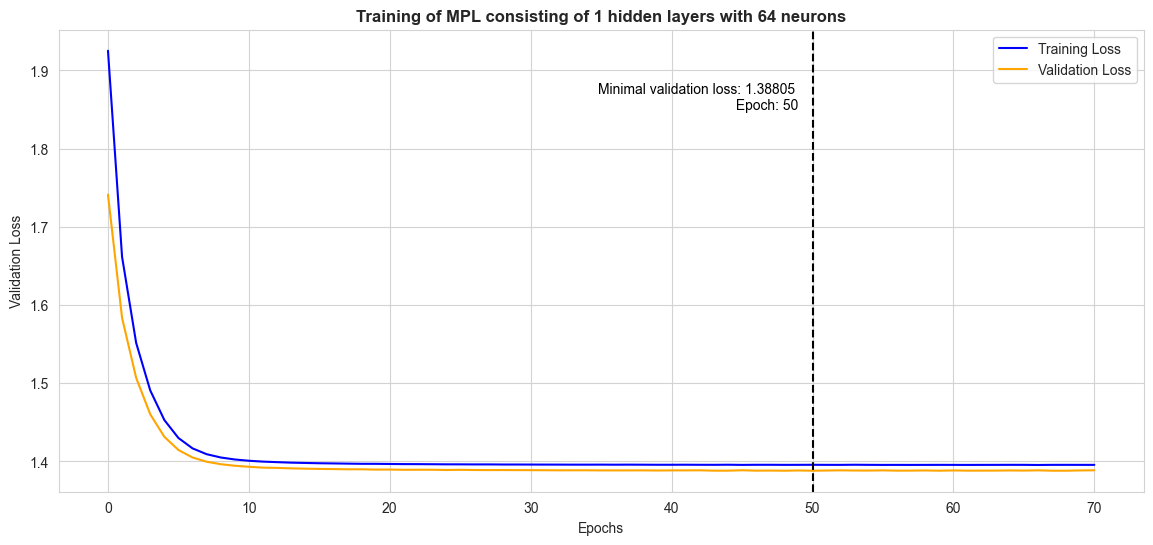

In [206]:
def plot_training_history(training_history, best_config):
    plt.figure(figsize=(14, 6))
    
    # Extract training and validation loss from the history
    train_loss = training_history[best_config]['loss']
    val_loss = training_history[best_config]['val_loss']
    
    # Plot training and validation loss
    plt.plot(train_loss, label='Training Loss', color='blue')
    plt.plot(val_loss, label='Validation Loss', color='orange')
    
    # Find the index where the validation loss is minimum
    best_val_loss_idx = val_loss.index(min(val_loss))
    
    # Draw vertical line at the index of best validation loss
    plt.axvline(x=best_val_loss_idx, color='black', linestyle='--')
    plt.text(best_val_loss_idx -1, min(val_loss)*1.33,
                        f'Minimal validation loss: {min(val_loss):.5f} \n Epoch: {best_val_loss_idx}', 
                     verticalalignment='bottom', horizontalalignment='right', color='black')
    
    plt.title('Training of MPL consisting of 1 hidden layers with 64 neurons', fontweight="bold")
    plt.xlabel('Epochs')
    plt.ylabel('Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.grid(color='lightgray')
    plt.gca().spines['top'].set_color('lightgray')
    plt.gca().spines['bottom'].set_color('lightgray')
    plt.gca().spines['left'].set_color('lightgray')
    plt.gca().spines['right'].set_color('lightgray')
    
    # Save the plot as an image file with high resolution (300 dpi)
    plt.savefig("best_model_training_plot.png", dpi=300, bbox_inches='tight')
    
    plt.show()

# Example usage:
plot_training_history(training_history, best_config)